# Analyze identical Individuals
There are two Bronze Age Sardinians

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp
import h5py
import allel

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-a-17-86.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 32


In [2]:
def get_idx_iid(f,sample, unique=True):
    """Return Index of sample samples in hdf5 f"""
    samples = pd.Series(f["samples"][:])
    idx = samples.str.contains(sample)
    idx = np.where(idx)[0]
    if unique:
        assert(len(idx)==1)
        return idx[0]
    else:
        return idx
    
def get_coverage(f, j):
    """Get Coverage of sample j in hdf5 f"""
    ads =  f["calldata/AD"][:,j,:]
    ads[ads<0]=0
    cov = np.mean(ads)*2
    return cov

def get_markers_good(f, j, output=True, cutoff=0.99):
    """Get markers"""
    m = np.max(f["calldata/GP"][:,j,:], axis=1)
    idx = (m>cutoff)
    if output:
        c1 = np.mean(m>cutoff)
        print(f"Filtering to {cutoff} GP variants: {c1:.3f}x")
    return idx

def get_fraction_identical(f, sample1="SUC006", sample2="R26.SG", 
                           gp_cutoff=0, cutoff=0.98, output=True):
    """Get Fraction of Identical Genotype Configurations"""
    j1 = get_idx_iid(f, sample1)
    j2 = get_idx_iid(f, sample2)
    
    idx1 = get_markers_good(f, j1, cutoff=cutoff, output=output)
    idx2 = get_markers_good(f, j2, cutoff=cutoff, output=output)
    idx = (idx1 & idx2)
    snp_frac = np.mean(idx)
    if output:
        print(f"Filtering to common GP variants: {snp_frac:.3f}x")
    
    gt1 = f["calldata/GT"][:, j1, :][idx,:]
    gt2 = f["calldata/GT"][:, j2, :][idx,:]
    g1, g2 = np.sum(gt1, axis=1), np.sum(gt2, axis=1)
    frac_same = np.mean(g1 == g2)
    return frac_same,snp_frac

In [43]:
f = h5py.File("./data/hdf5/1240k_v43/ch2.h5", "r") # Load for Sanity Check. See below!

In [44]:
j1 = get_idx_iid(f, "KPT002_petrous")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "UKY001")
print(get_coverage(f, j2))

0.7771743543933733
0.7996284716582751


In [45]:
get_fraction_identical(f, sample1="KPT002_petrous", sample2="UKY001", cutoff=0.99)

Filtering to 0.99 GP variants: 0.821x
Filtering to 0.99 GP variants: 0.824x
Filtering to common GP variants: 0.784x


(0.9999741180733493, 0.7844120513236966)

# Plot curve of identical genotypes

f = h5py.File("./data/hdf5/1240k_v43/ch1.h5", "r") # Load for Sanity Check. See below!

In [ ]:
cutoffs = np.linspace(0.4,0.99,20)
y = [get_fraction_identical(f, sample1="SUC006", sample2="R26.SG", cutoff=c) 
         for c in cutoffs]
y=np.array(y)
identical=y[:,0]
snp_frac=y[:,1]

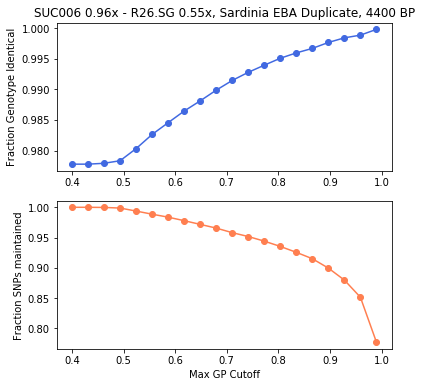

In [45]:
fig = plt.figure(figsize=(6,6))

gs = gridspec.GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[1,0])
ax = fig.add_subplot(gs[0, 0])
ax.plot(cutoffs, identical, "o-", c="royalblue")

ax.set_ylabel("Fraction Genotype Identical")
ax.set_title("SUC006 0.96x - R26.SG 0.55x, Sardinia EBA Duplicate, 4400 BP")

ax1.plot(cutoffs, snp_frac,"o-",c="coral")
ax1.set_xlabel("Max GP Cutoff")
ax1.set_ylabel("Fraction SNPs maintained")
#ax1.tick_params(axis='y', labelcolor="coral")
plt.show()

In [33]:
list(f["calldata/PL"][:10,100,:])

[array([ 0,  6, 62], dtype=int32),
 array([  0,  18, 178], dtype=int32),
 array([ 0,  3, 36], dtype=int32),
 array([ 0,  3, 36], dtype=int32),
 array([  0,  12, 124], dtype=int32),
 array([  0,  12, 123], dtype=int32),
 array([  0,  30, 249], dtype=int32),
 array([ 0,  6, 72], dtype=int32),
 array([ 0,  6, 72], dtype=int32),
 array([  0,  18, 180], dtype=int32)]

In [34]:
f["samples"][:]

array(['I0626_all', 'I0627_all', 'I1137_all_published', ...,
       'I5105_new.SG', 'I6729_new.SG', 'I6801_new.SG'], dtype=object)

In [35]:
j1 = get_idx_iid(f, "SUC006")

### Duo #2
England Neolithic Power House

In [48]:
f = h5py.File("./data/hdf5/1240k_v43/ch6.h5", "r") # Load for Sanity Check. See below!

In [50]:
j1 = get_idx_iid(f, "I13893")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "I20820")
print(get_coverage(f, j2))

2.4882457728586864
0.6046345238442894


In [ ]:
cutoffs = np.linspace(0.4,0.99,20)
y = [get_fraction_identical(f, sample1="I13893", sample2="I20820", cutoff=c) 
         for c in cutoffs]
y=np.array(y)
identical=y[:,0]
snp_frac=y[:,1]

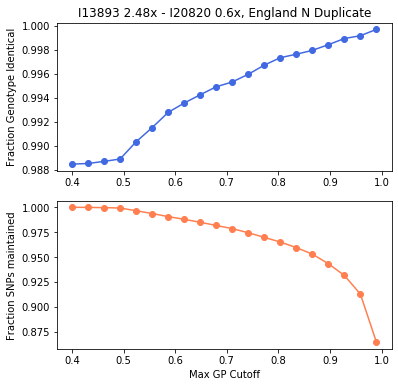

In [51]:
fig = plt.figure(figsize=(6,6))

gs = gridspec.GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[1,0])
ax = fig.add_subplot(gs[0, 0])
ax.plot(cutoffs, identical, "o-", c="royalblue")

ax.set_ylabel("Fraction Genotype Identical")
ax.set_title("I13893 2.48x - I20820 0.6x, England N Duplicate")

ax1.plot(cutoffs, snp_frac,"o-",c="coral")
ax1.set_xlabel("Max GP Cutoff")
ax1.set_ylabel("Fraction SNPs maintained")
#ax1.tick_params(axis='y', labelcolor="coral")
plt.show()

In [55]:
get_fraction_identical(f, sample1="I13893", sample2="I20820", cutoff=0.99)

Filtering to 0.99 GP variants: 0.967x
Filtering to 0.99 GP variants: 0.872x
Filtering to common GP variants: 0.864x


(0.9996959459459459, 0.8644102444295184)